In [2]:
#import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [3]:
#Displaying File Paths in the Input Directory
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:
# Loading the Dataset from CSV File
train = pd.read_csv("/content/tweets.csv")


In [5]:
train.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


In [6]:
train.tweet[:20]

0     #fingerprint #Pregnancy Test https://goo.gl/h1...
1     Finally a transparant silicon case ^^ Thanks t...
2     We love this! Would you go? #talk #makememorie...
3     I'm wired I know I'm George I was made that wa...
4     What amazing service! Apple won't even talk to...
5     iPhone software update fucked up my phone big ...
6     Happy for us .. #instapic #instadaily #us #son...
7     New Type C charger cable #UK http://www.ebay.c...
8     Bout to go shopping again listening to music #...
9     Photo: #fun #selfie #pool #water #sony #camera...
10    hey #apple when you make a new ipod dont make ...
11    Ha! Not heavy machinery but it does what I nee...
12    Contemplating giving in to the iPhone bandwago...
13    I just made another crazy purchase lol my theo...
14    @shaqlockholmes @sam_louise1991 the battery is...
15    From #DeepEllum towards #downtown #Dallas. #Bi...
16    Like and Share if you want this 3D Phone Case ...
17    Go crazy !! #iphonesia, #iphone, #instagoo

In [7]:
# Tokenize
badword='$&@*#'
tt=train['tweet'].apply(lambda x:x.split())

In [8]:
tt[:5]

0    [#fingerprint, #Pregnancy, Test, https://goo.g...
1    [Finally, a, transparant, silicon, case, ^^, T...
2    [We, love, this!, Would, you, go?, #talk, #mak...
3    [I'm, wired, I, know, I'm, George, I, was, mad...
4    [What, amazing, service!, Apple, won't, even, ...
Name: tweet, dtype: object

In [9]:
# Replace Patterned Strings in Nested Lists
z=[]
for i in tt:
    l=[]
    for j in i:
        if j.__contains__('$&@*#'):
            j=j.replace(j,'bad')
        l.append(j)
    z.append(l)

In [10]:
train['tweets']=z

In [11]:
print(train.tweet[26])
print(train.tweets[26])

$&@*# my ipod is all messed up and i haven't done nothing to it #$&@*# #MyLoss ! #Apple
['bad', 'my', 'ipod', 'is', 'all', 'messed', 'up', 'and', 'i', "haven't", 'done', 'nothing', 'to', 'it', 'bad', '#MyLoss', '!', '#Apple']


In [12]:
#Join Words in Tweets and Create New Column
l=[]
for i in train['tweets']:
    l.append(" ".join(i))
train['tweet_r']=l

In [15]:
# Function to Clean Tweets by Removing URLs and Special Characters

def process_tweets(train):
    train['mail_tweets']=train['tweet_r'].str.replace('https?://[A-Za-z0-9./]+',' ')
    train['clean_tweets']=train['tweet_r'].str.replace('[^a-zA-Z]',' ')
process_tweets(train)

In [16]:
train.head()

,id,label,tweet,tweets,tweet_r,mail_tweets,clean_tweets
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...,"[#fingerprint, #Pregnancy, Test, https://goo.g...",#fingerprint #Pregnancy Test https://goo.gl/h1...,#fingerprint #Pregnancy Test https://goo.gl/h1...,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...,"[Finally, a, transparant, silicon, case, ^^, T...",Finally a transparant silicon case ^^ Thanks t...,Finally a transparant silicon case ^^ Thanks t...,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...,"[We, love, this!, Would, you, go?, #talk, #mak...",We love this! Would you go? #talk #makememorie...,We love this! Would you go? #talk #makememorie...,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...,"[I'm, wired, I, know, I'm, George, I, was, mad...",I'm wired I know I'm George I was made that wa...,I'm wired I know I'm George I was made that wa...,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...,"[What, amazing, service!, Apple, won't, even, ...",What amazing service! Apple won't even talk to...,What amazing service! Apple won't even talk to...,What amazing service! Apple won't even talk to...


In [17]:
# Dropping unwanted columns
train.drop(columns=['tweet','tweets','id','tweet_r','mail_tweets'],inplace=True)

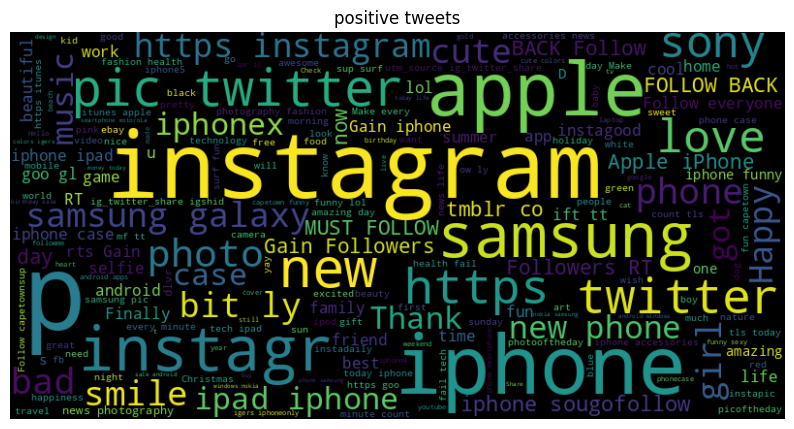

In [18]:
#Visualizing all the positive tweets using wordcloud plot.
positive=' '.join([text for text in train['clean_tweets'][train['label']==0]])
wordcloud=WordCloud(width=800,height=400,random_state=21,max_font_size=110).generate(positive)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('positive tweets')
plt.show()

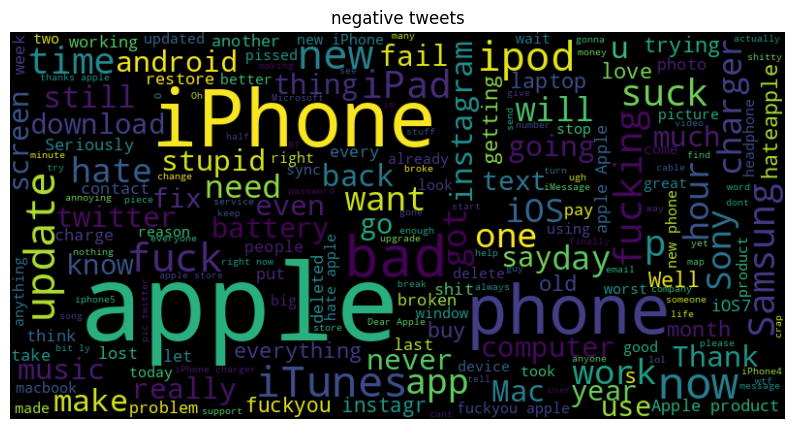

In [19]:
#Visualizing all the negative tweets using wordcloud plot.
positive=' '.join([text for text in train['clean_tweets'][train['label']==1]])
wordcloud=WordCloud(width=800,height=400,random_state=21,max_font_size=110).generate(positive)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('negative tweets')
plt.show()

<Axes: ylabel='label'>

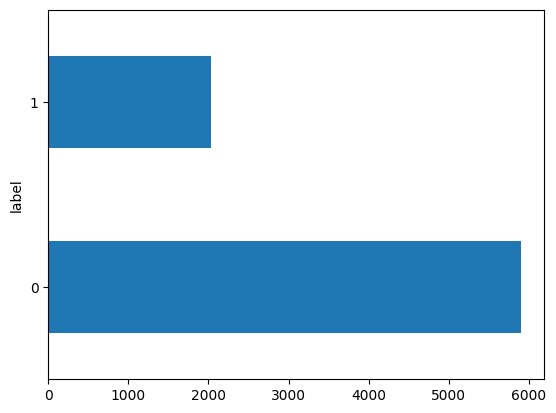

In [20]:
# Plotting the Distribution of Labels

train['label'].value_counts().plot(kind='barh')

In [21]:
# Vectorizing the Tweets Using Bag of Words (BoW) and TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2,max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(train['clean_tweets'])
bow.shape

(7920, 1000)

In [22]:
# Vectorizing the Tweets Using TF-IDF

tdf_vectorize=TfidfVectorizer(max_df=0.90, min_df=2,max_features=1000)
tfidf = tdf_vectorize.fit_transform(train['clean_tweets'])
tfidf.shape

(7920, 1000)

In [23]:
# mporting Necessary Libraries for Model Training

from sklearn.linear_model import LogisticRegression #import LinerRegression from sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [24]:
#Splitting Data into Training and Validation Sets for Bag-of-Words Model

xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(bow,train['label'],random_state=42,test_size=0.3)

In [25]:
# Splitting Data into Training and Validation Sets for TF-IDF Model

xtrain_tdf, xvalid_tdf, ytrain, yvalid = train_test_split(tfidf, train['label'],random_state=42,test_size=0.3)

In [26]:
#using Bag of word features
lr=LogisticRegression()
lr.fit(xtrain_bow,ytrain)
lr.score(xvalid_bow,yvalid)

0.877104377104377

In [27]:
#using TF-IDF features
lr=LogisticRegression()
lr.fit(xtrain_tdf,ytrain)
lr.score(xvalid_tdf,yvalid)

0.8897306397306397

In [ ]:
# THE ACCURACY SCORE OF THE MODEL ON THE TEST SET IS 0.88